In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
Bet_path = '/bettik/bouissob/'
Bet_iso_path = Bet_path + 'ISOMIP+/'

In [3]:
D = glob.glob(Bet_iso_path + '*.nc')

In [4]:
Datas = [file.replace(Bet_path + 'ISOMIP+/', '')[7:] for file in D]
Names = [d.replace('.nc', '') for d in Datas]

In [5]:
Names = list(set(Names))

In [6]:
def plot_all(Var = 'thermalDriving'):
    file = []
    Var_Name = ['thermalDriving', 'halineDriving', 'meltRate']
    masks = [9.969209968386869e+36]
    nrows = 4
    ncol = 5
    fig, axes = plt.subplots(nrows, ncol, figsize=(25, 15))

    for Ind_P, Name in enumerate(Names):
        Files = glob.glob(Bet_iso_path + '*' + Name + '*')
        dfT = pd.DataFrame()
        for ind, f in enumerate(Files):
            df = pd.DataFrame()
            Oc_N = f.replace(Bet_path + 'ISOMIP+/', '')[5]
            Data = xr.open_dataset(f, decode_times = False)
            tmx = int(max(Data.nTime))
            tmx = 239
            df[Var_Name] = Data[Var_Name].sel(nTime = tmx).to_dataframe().reset_index(drop = True)
            df.dropna(inplace = True)
            df = df[df[Var_Name].isin(masks) == False]
            df = df[df.halineDriving > -40]
            df['Oc_N']  = int(Oc_N)
            dfT = pd.concat([dfT, df]).reset_index(drop=True)
        y, x = int(Ind_P/ncol), Ind_P%ncol
        for k,d in dfT.groupby('Oc_N'):
            axes[y][x].scatter(d[Var], d['meltRate'], label=k, s= 1.5,)
        axes[y][x].set_title(Name)
        lab = ('Thermal driving (°C)' if Var == 'thermalDriving' else "Haline driving (PSU)" )
        axes[y][x].set_xlabel(lab)
        axes[y][x].set_ylabel('Melt rates (m/s)')
        axes[y][x].legend(loc = 'upper right')
    fig.subplots_adjust(hspace=0.3)
    plt.show()

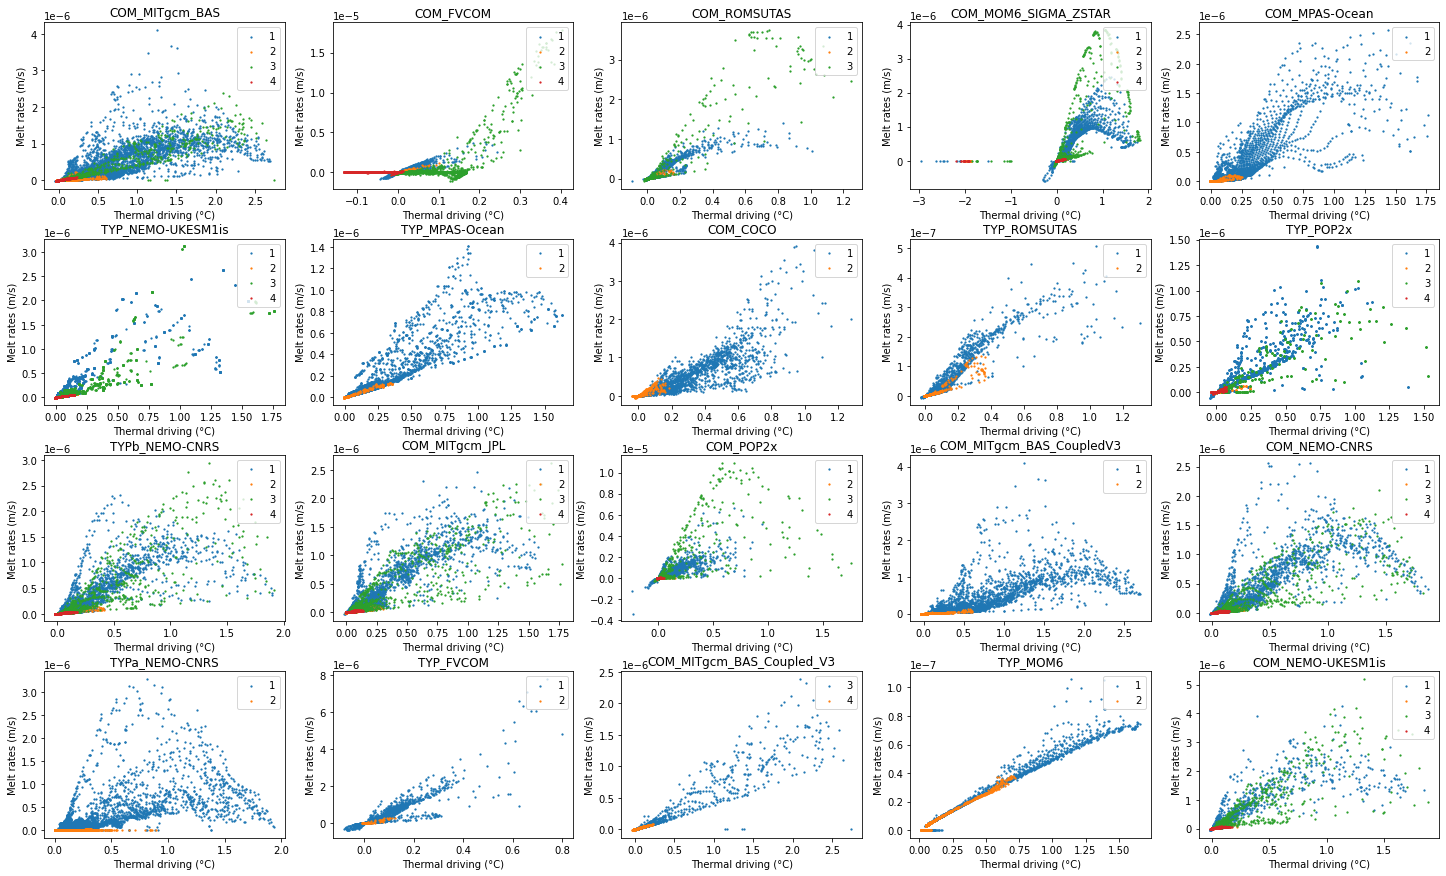

In [7]:
plot_all('thermalDriving')

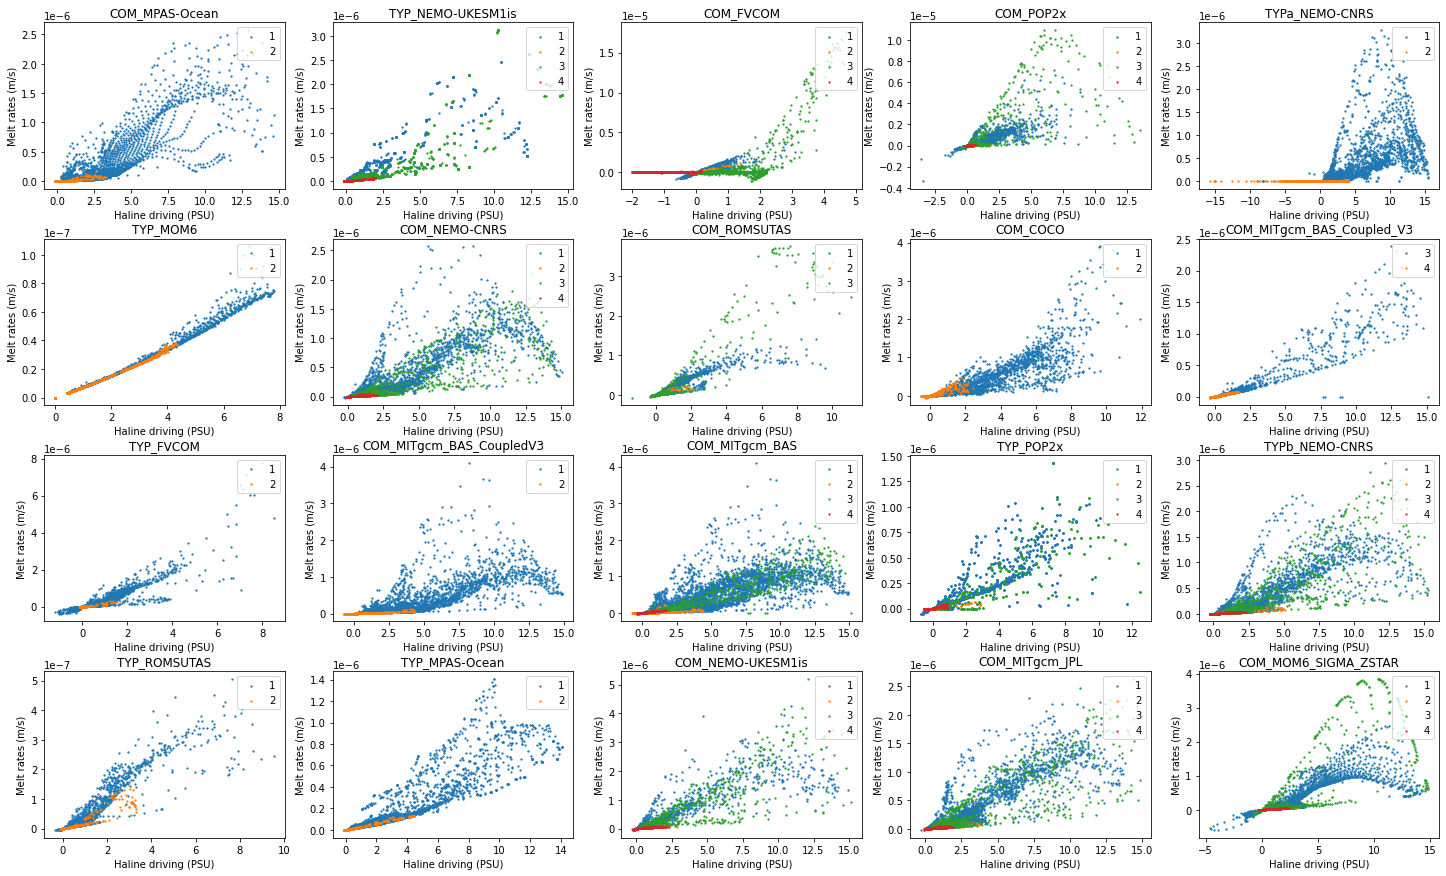

In [171]:
plot_all('halineDriving')